Basic Information extract - cash request - data analyst.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                    

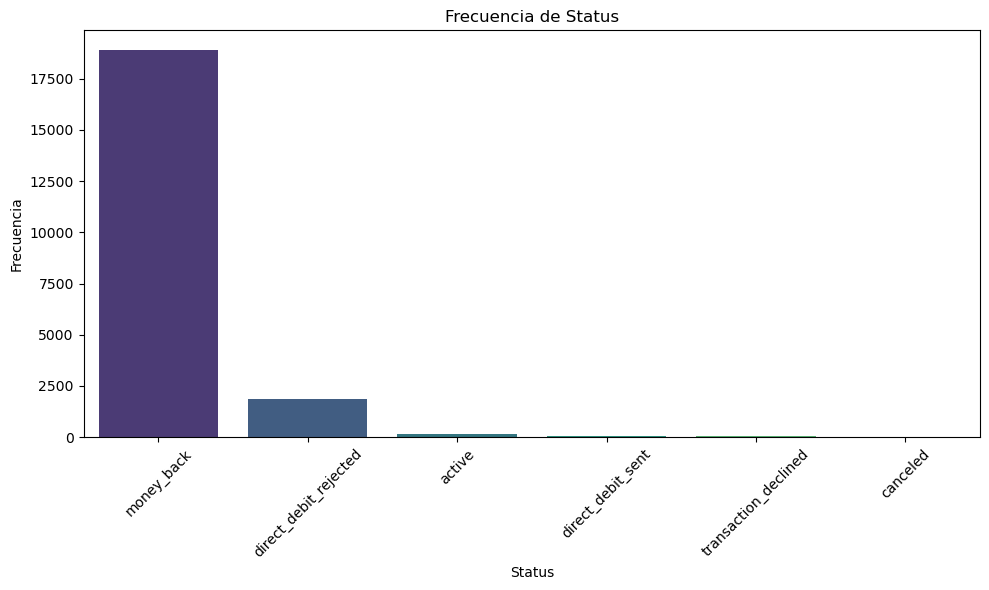

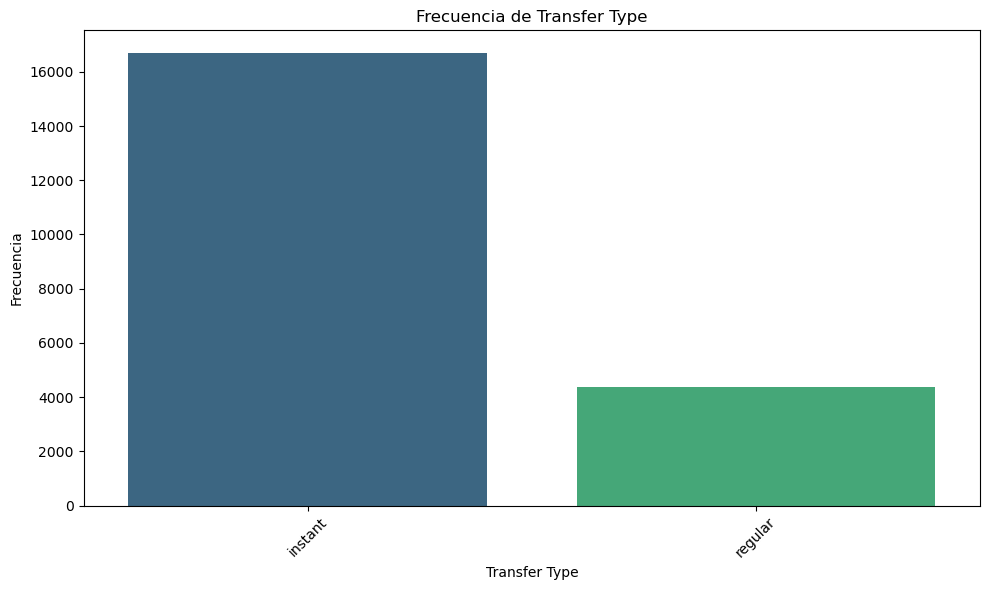

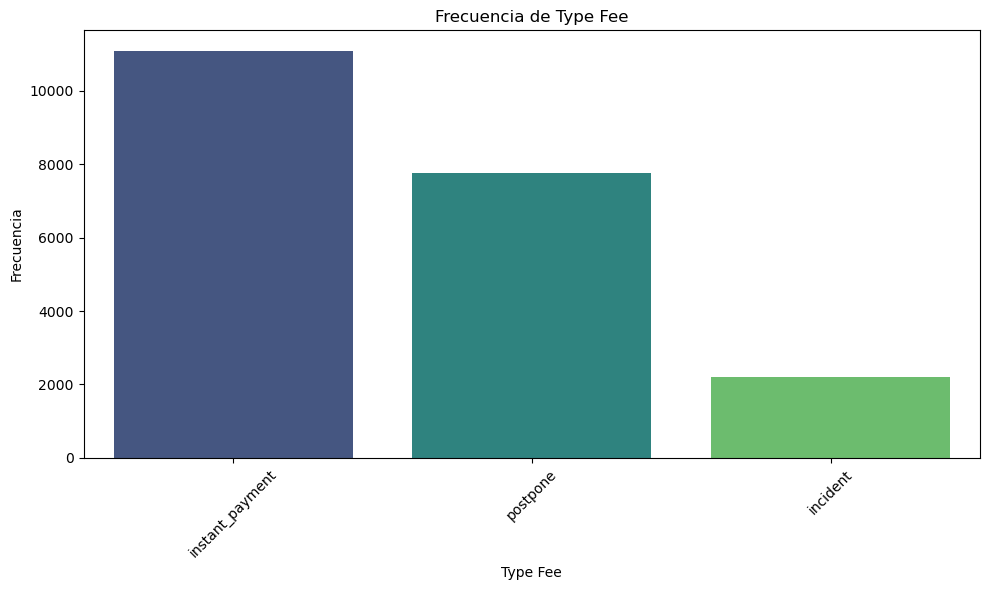

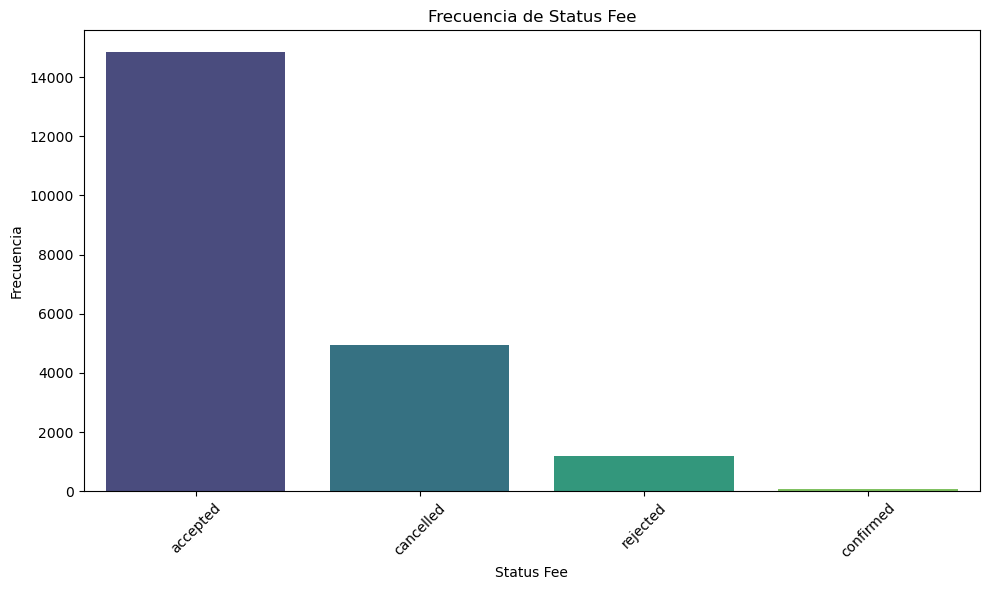

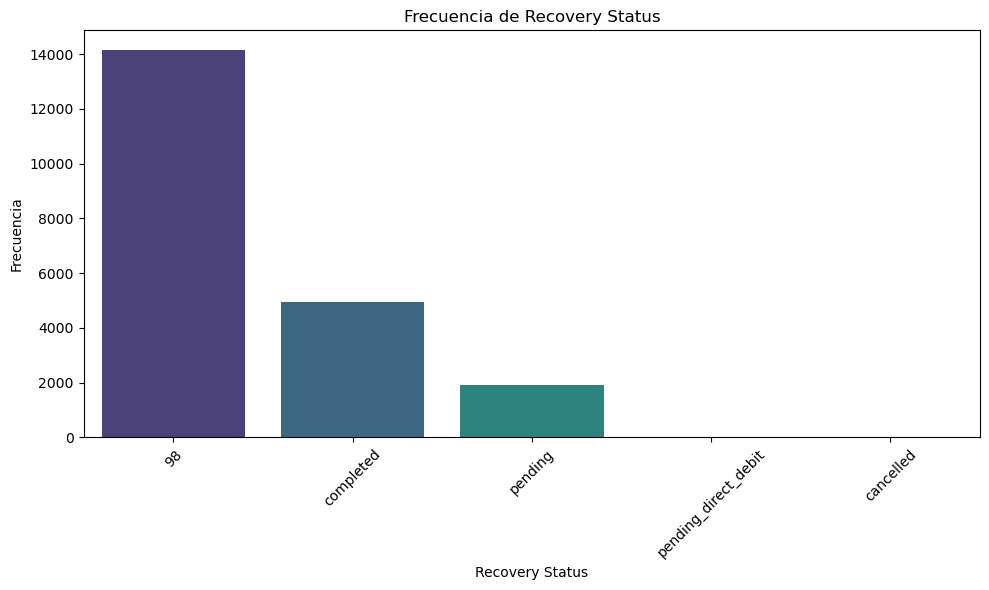

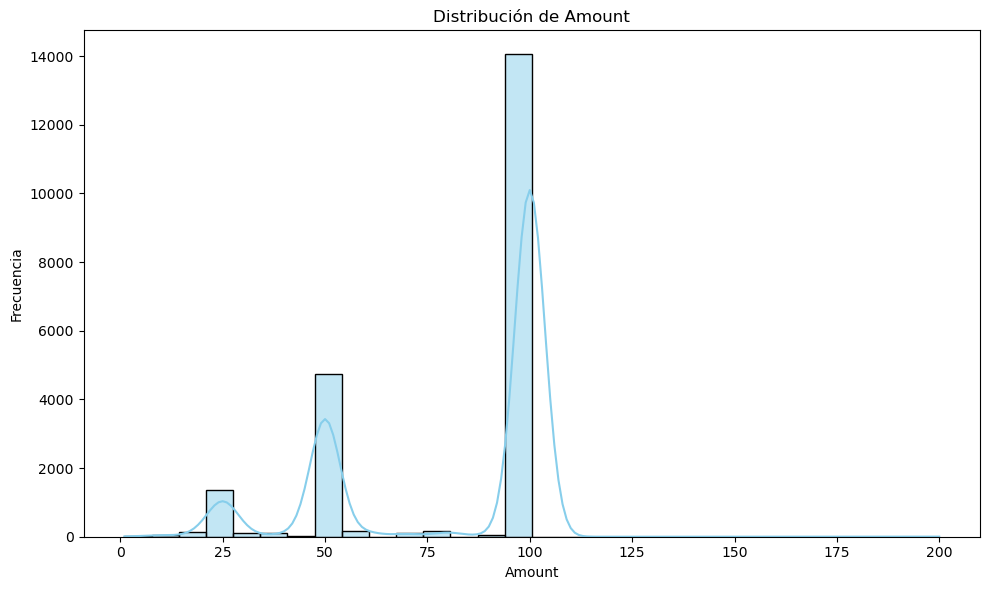

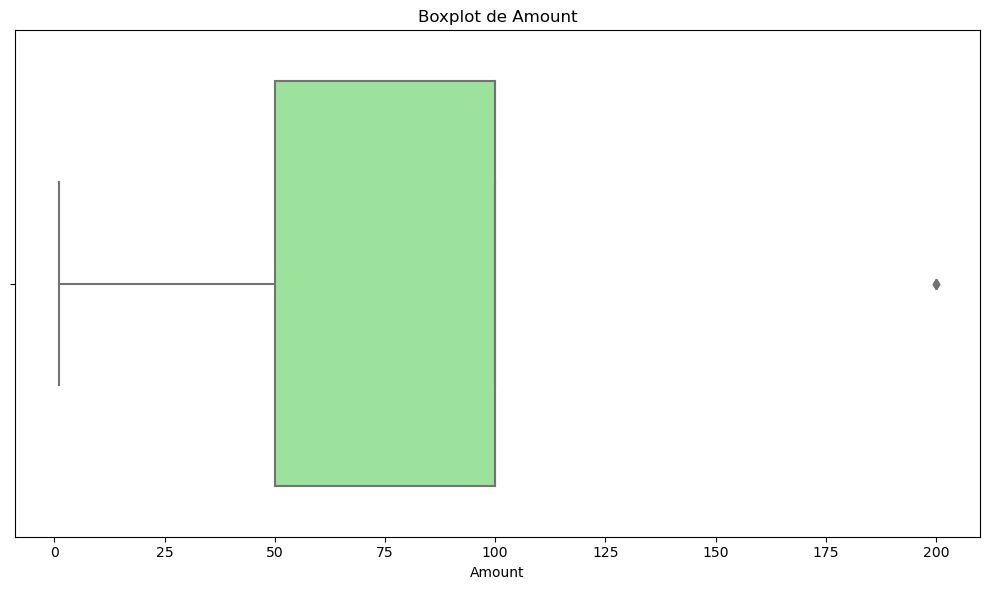

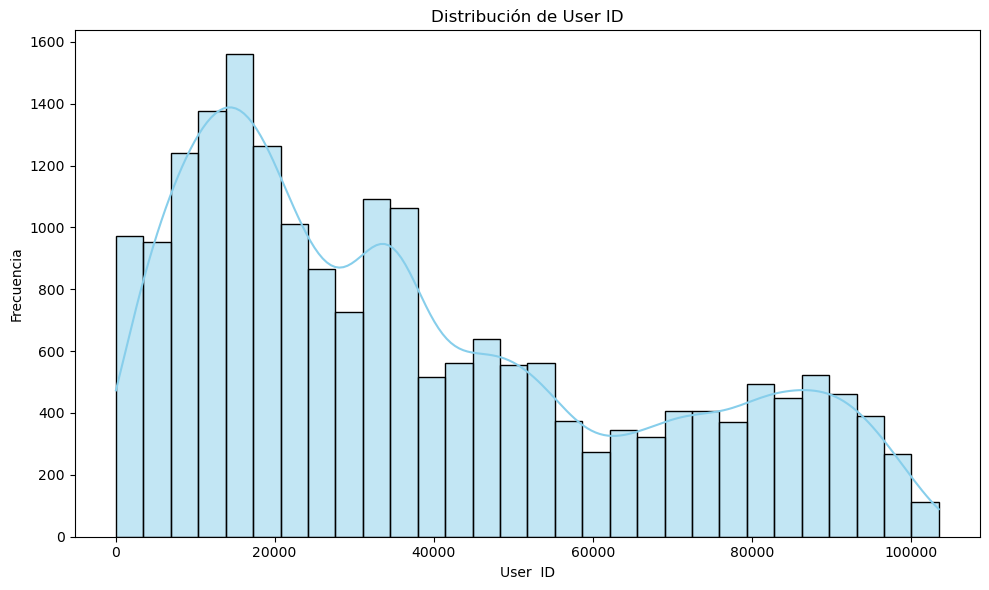

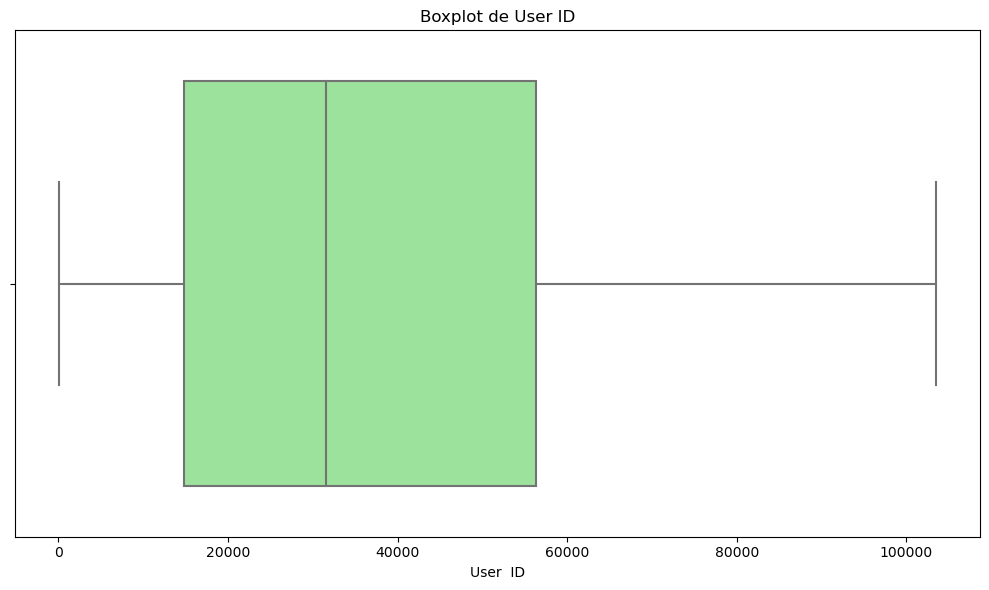

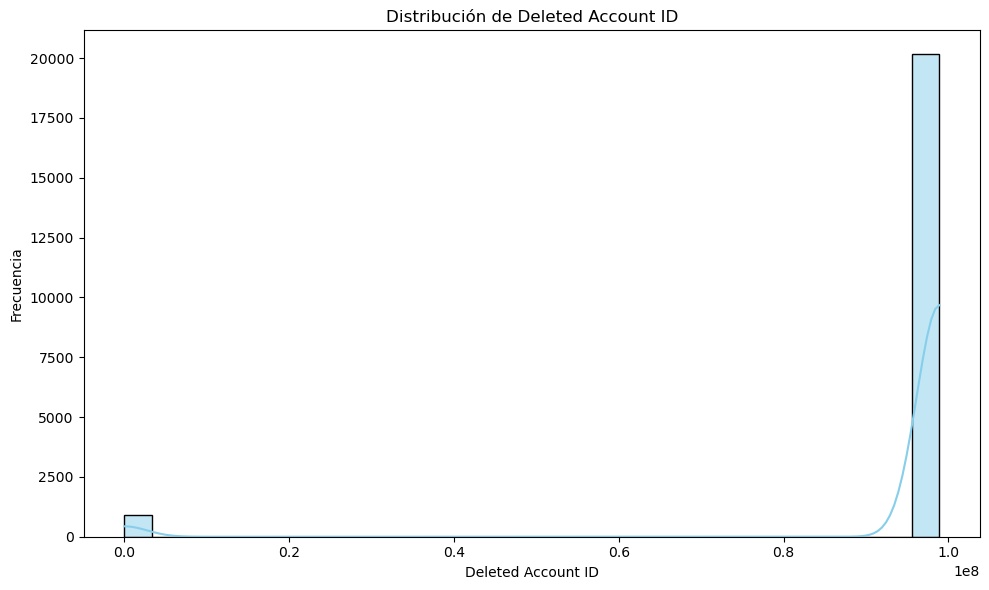

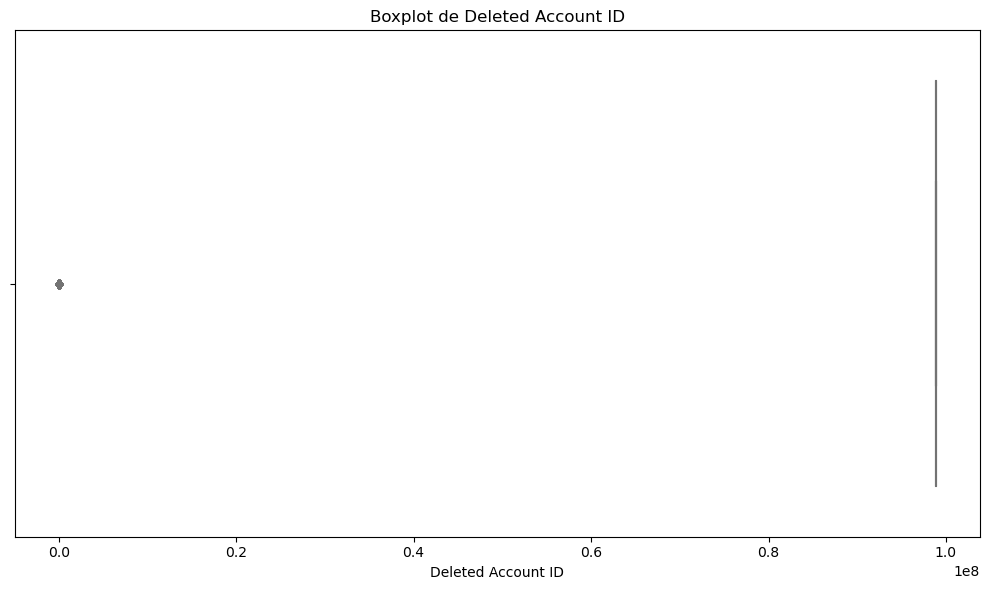

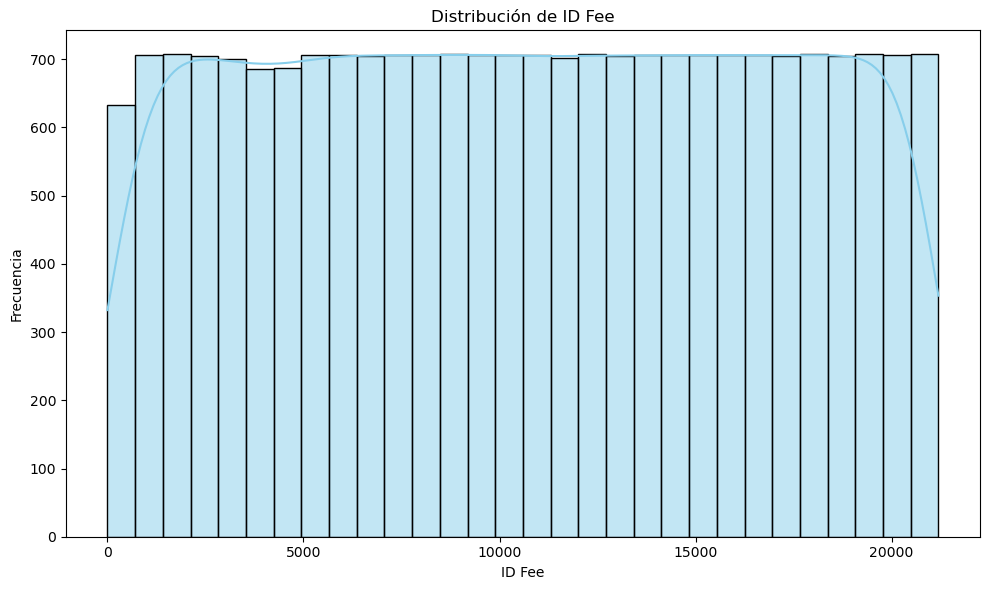

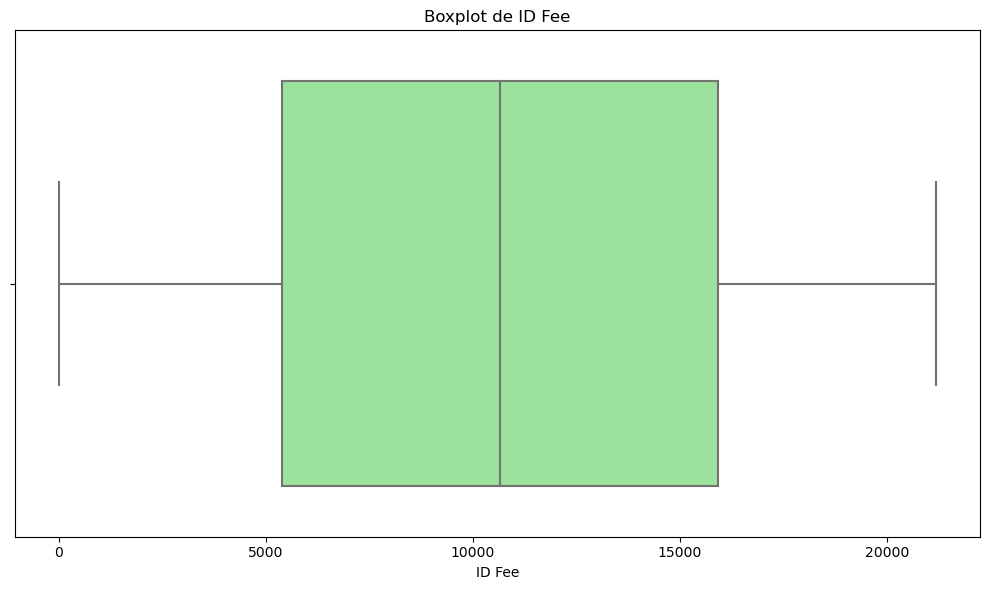

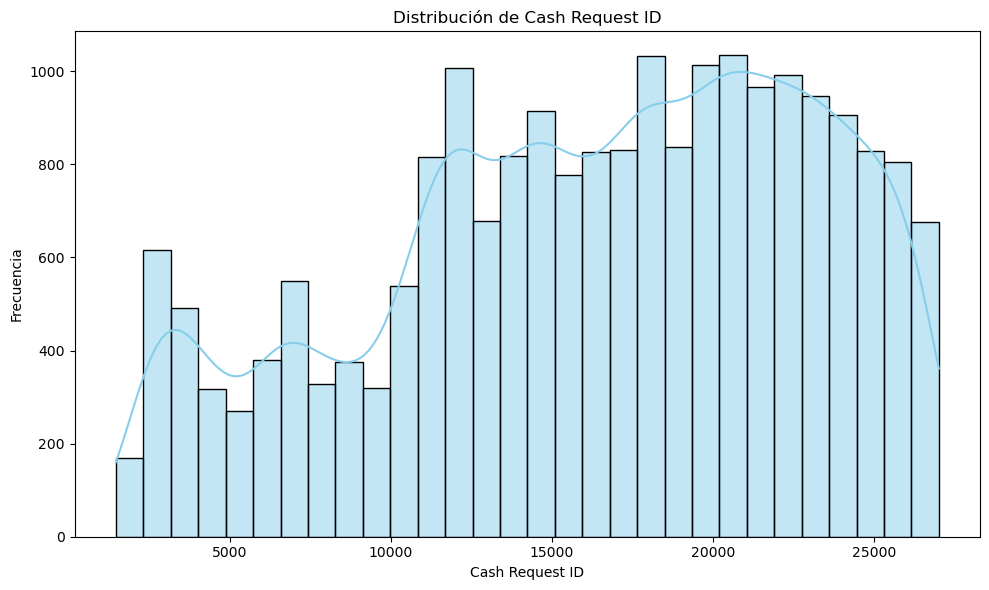

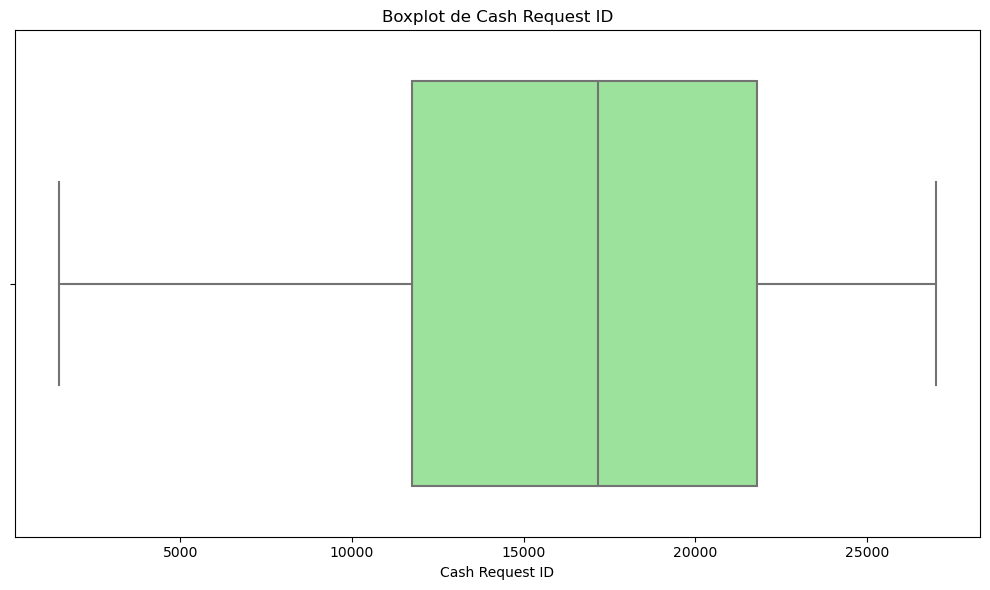

In [1]:
%run analisis_calidad_datos2.ipynb

In [27]:
print(merged_df.select_dtypes(include=['number']).columns)

Index(['id', 'amount', 'user_id', 'deleted_account_id', 'id_fee',
       'cash_request_id', 'total_amount_fee', 'recovery_status_encoded'],
      dtype='object')


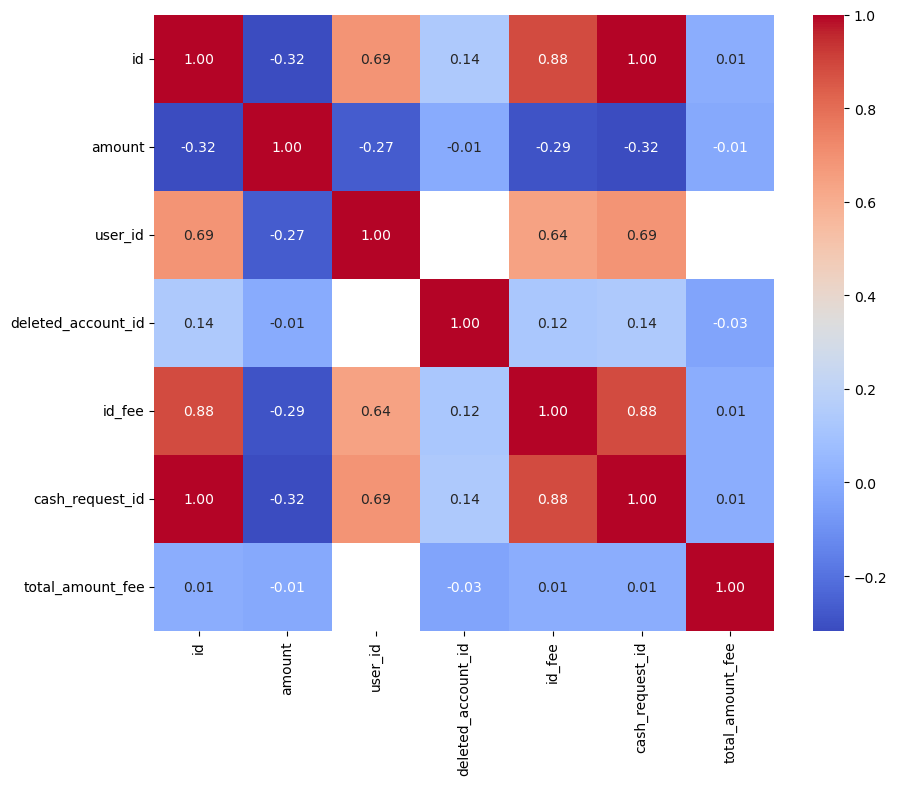

In [2]:
# Seleccionar solo las columnas numéricas
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para columnas numéricas
correlation_matrix = numerical_cols.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Mostrar el gráfico
plt.show()


In [3]:
# Eliminar filas con valores nulos
merged_df_clean = merged_df.dropna()

# O, si prefieres rellenar los valores nulos con la media
# merged_df_clean = merged_df.fillna(merged_df.mean())

# Calcular la matriz de correlación
correlation_matrix = merged_df_clean.corr()


C:\Users\heatb\AppData\Local\Temp\ipykernel_7596\1517745208.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df_clean.corr()


In [7]:
#Primero queremos predecir los incidentes relacionados con los pagos
#La variable objetivo será recovery_status
# Listar todas las columnas del DataFrame

from sklearn.preprocessing import LabelEncoder

# Convertir todos los valores de recovery_status a cadenas de texto
merged_df['recovery_status'] = merged_df['recovery_status'].astype(str)

# Asigna un número único a cada categoría distinta
encoder = LabelEncoder()
merged_df['recovery_status_encoded'] = encoder.fit_transform(merged_df['recovery_status'])

# Ver los valores codificados
print(merged_df[['recovery_status', 'recovery_status_encoded']].drop_duplicates())




           recovery_status  recovery_status_encoded
0                       98                        0
2                  pending                        3
52               completed                        2
459   pending_direct_debit                        4
4268             cancelled                        1


In [8]:
import statsmodels.api as sm

# Selección de variables independientes (ejemplo)
X = merged_df[['amount', 'type_fee', 'status_fee', 'category_fee']]  # Variables independientes
X = pd.get_dummies(X, drop_first=True)  # Realizamos One-Hot Encoding si es necesario

# Agregamos una constante (intercepto)
X = sm.add_constant(X)

# Variable dependiente
y = merged_df['recovery_status_encoded']

# Ajustamos el modelo OLS
model = sm.OLS(y, X).fit()

# Imprimimos el resumen del modelo
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     recovery_status_encoded   R-squared:                       0.401
Model:                                 OLS   Adj. R-squared:                  0.400
Method:                      Least Squares   F-statistic:                     2010.
Date:                     Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                             12:40:59   Log-Likelihood:                -26605.
No. Observations:                    21057   AIC:                         5.323e+04
Df Residuals:                        21049   BIC:                         5.329e+04
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

R-squared: 0.401
Este valor indica que el 40.1% de la variabilidad en la variable dependiente (recovery_status_encoded) está explicada por las variables independientes en el modelo. Aunque no es un valor extremadamente alto, muestra que algunas de las variables que estás utilizando tienen una relación significativa con el estado de recuperación.



In [10]:
correlation_matrix = merged_df.corr()
print(correlation_matrix['recovery_status_encoded'].sort_values(ascending=False))


recovery_status_encoded    1.000000
total_amount_fee          -0.004668
amount                    -0.018439
deleted_account_id        -0.050492
id_fee                    -0.116983
user_id                   -0.134401
id                        -0.263599
cash_request_id           -0.263599
Name: recovery_status_encoded, dtype: float64


C:\Users\heatb\AppData\Local\Temp\ipykernel_7596\2545479201.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


In [12]:
# Variables categóricas a codificar
categorical_vars = ['type_fee', 'status_fee', 'category_fee']

# Aplicar One-Hot Encoding
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_vars, drop_first=True)

# Ver las primeras filas del DataFrame codificado
print(merged_df_encoded.head())


      id  amount      status                     created_at  \
0  23534    25.0  money_back  2020-10-23 15:20:26.163927+00   
1   2203   100.0  money_back   2020-05-27 02:26:27.61519+00   
2   6098   100.0      active   2020-07-01 09:30:03.14541+00   
3   6098   100.0      active   2020-07-01 09:30:03.14541+00   
4   6098   100.0      active   2020-07-01 09:30:03.14541+00   

                      updated_at  user_id                   moderated_at  \
0  2020-12-18 13:08:29.099365+00  21465.0                             98   
1   2020-06-09 11:25:51.72636+00   2109.0  2020-05-27 10:02:13.094467+00   
2  2020-08-11 22:27:58.240406+00  23328.0  2020-07-01 16:44:53.070844+00   
3  2020-08-11 22:27:58.240406+00  23328.0  2020-07-01 16:44:53.070844+00   
4  2020-08-11 22:27:58.240406+00  23328.0  2020-07-01 16:44:53.070844+00   

   deleted_account_id      reimbursement_date cash_request_received_date  ...  \
0          98888888.0  2020-11-10 23:51:00+00                         98  ...   
1 

In [13]:
# Calcular la nueva matriz de correlación
new_correlation_matrix = merged_df_encoded.corr()

# Filtrar solo las correlaciones con 'recovery_status_encoded'
correlations_with_target = new_correlation_matrix['recovery_status_encoded'].sort_values(ascending=False)

# Mostrar las correlaciones
print(correlations_with_target)


recovery_status_encoded                1.000000
status_fee_rejected                    0.462222
category_fee_rejected_direct_debit     0.381130
category_fee_month_delay_on_payment    0.284383
status_fee_cancelled                   0.093704
total_amount_fee                      -0.004668
status_fee_confirmed                  -0.006592
type_fee_postpone                     -0.009680
amount                                -0.018439
deleted_account_id                    -0.050492
id_fee                                -0.116983
user_id                               -0.134401
id                                    -0.263599
cash_request_id                       -0.263599
type_fee_instant_payment              -0.287397
Name: recovery_status_encoded, dtype: float64


C:\Users\heatb\AppData\Local\Temp\ipykernel_7596\2327243182.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlation_matrix = merged_df_encoded.corr()


In [15]:
# Evitar problemas con valores <= 0
merged_df['log_amount'] = np.log1p(merged_df['amount'])
merged_df['log_total_amount_fee'] = np.log1p(merged_df['total_amount_fee'])

# Verificar las nuevas columnas
print(merged_df[['amount', 'log_amount', 'total_amount_fee', 'log_total_amount_fee']].head())


   amount  log_amount  total_amount_fee  log_total_amount_fee
0    25.0    3.258097               5.0              1.791759
1   100.0    4.615121               5.0              1.791759
2   100.0    4.615121               5.0              1.791759
3   100.0    4.615121               5.0              1.791759
4   100.0    4.615121               5.0              1.791759
